In [5]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [6]:
data = pd.read_csv('products.csv' , sep='\t')

/tmp/ipykernel_83200/2405384287.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('products.csv' , sep='\t')


In [7]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [8]:
pd.isnull(data).sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [15]:
data_clean = data.copy() #On crée une copie du dataframe pour pouvoir le modifier

Nettoyons le jeu de données en supprimant les colonnes ayant plus de 100k valeurs nulles mais on garde les pnns groupes

In [16]:
for cat in data:
    if (pd.isnull(data[cat]).sum()>100000 and cat!='pnns_groups_1' and cat!='pnns_groups_2'):
        data_clean.drop(labels=cat, axis = 'columns', inplace=True)

In [17]:
data_clean.shape

(320772, 34)

In [18]:
data_clean

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,en:RO,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint 

## On s'est débarassé de 132 colonnes ! Cependant, il nous en reste encore 34... On va trier les variables qui nous seront utiles à la main.

In [19]:
basket=['creator','created_t','created_datetime','last_modified_t',
        'brands_tags','countries','countries_tags','countries_fr',
        'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','states','states_tags','states_fr']
data_clean.drop(labels=basket, axis=1, inplace=True)

In [20]:
data_clean

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,d,NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,b,NaN,NaN,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,d,NaN,NaN,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,b,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00000,0.000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,NaN,NaN,NaN,NaN,Salty snacks,Appetizers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data_clean.loc[pd.isnull(data_clean['energy_100g'])]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,18371,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:13Z,Real Salt Granular,Redmond,Ancient sea salt with natural trace minerals,0.0,[ ancient-sea-salt-with-natural-trace-mineral...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.15678,37.857,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,2015-06-17T10:11:54Z,Filet de bœuf,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,33084,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:09Z,Fine Sea Salt,Unfi,New zealand sea salt with natural trace elements.,0.0,[ new-zealand-sea-salt-with-natural-trace-ele...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.90582,39.333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,2015-11-01T11:20:39Z,Rillette d'oie,"Sans marque,D.Lambert","viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,NaN,Fish Meat Eggs,Processed meat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320766,99410148,http://world-fr.openfoodfacts.org/produit/9941...,2017-04-03T18:34:58Z,NaN,NaN,NaN,NaN,NaN,NaN,Salty snacks,Nuts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,NaN,NaN,NaN,NaN,Salty snacks,Appetizers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data_clean.loc[pd.isnull(data_clean['product_name'])]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,7020254,http://world-fr.openfoodfacts.org/produit/0000...,2015-01-02T14:52:53Z,NaN,A&W,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,9336247,http://world-fr.openfoodfacts.org/produit/0000...,2016-11-13T09:40:10Z,NaN,NaN,NaN,NaN,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,50157846,http://world-fr.openfoodfacts.org/produit/0000...,2016-12-27T14:08:58Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,69105241,http://world-fr.openfoodfacts.org/produit/0000...,2016-06-26T09:31:59Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320747,9800895250,http://world-fr.openfoodfacts.org/produit/9800...,2017-03-26T18:58:17Z,NaN,NaN,NaN,NaN,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320748,9802735,http://world-fr.openfoodfacts.org/produit/9802735,2016-09-01T11:09:27Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320752,98709870987,http://world-fr.openfoodfacts.org/produit/9870...,2016-09-24T15:03:13Z,NaN,NaN,NaN,NaN,NaN,NaN,Beverages,Sweetened beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320755,988639,http://world-fr.openfoodfacts.org/produit/988639,2017-03-26T18:58:18Z,NaN,NaN,NaN,NaN,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ici on voit bien que les individus n'ayant pas de valeur 'energy_100g' n'ont presque aucune valeur. On peut donc les enlever. De même on peut enlever les individus n'ayant pas de nom.

In [23]:
data_cln=data_clean.copy()

In [24]:
data_clean.loc[~pd.isnull(data_clean['energy_100g'])].shape

(261113, 21)

In [25]:
data_cln.loc[data['product_name'].isnull()].shape

(17762, 21)

In [26]:
data_cln.drop(labels = data_cln.loc[data['energy_100g'].isnull()].index, axis = 0, inplace=True)

In [27]:
data_cln.drop(labels = data_cln.loc[data['product_name'].isnull()].index, axis = 0, inplace=True)

In [28]:
data_cln

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,d,NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,b,NaN,NaN,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250000,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,d,NaN,NaN,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482000,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,NaN,1933.0,18.27,1.92,63.46,11.54,13.46,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320756,989898,http://world-fr.openfoodfacts.org/produit/9898...,2016-09-12T15:40:15Z,Test NF App,NaN,"Coco, choco",0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],NaN,NaN,NaN,569.0,31.00,NaN,12.20,9.60,2.10,1.10000,0.433071,NaN,NaN
320757,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,2017-04-01T20:52:19Z,Amandes,Biosic,NaN,NaN,NaN,b,NaN,NaN,2406.0,NaN,3.73,NaN,3.89,21.22,0.10000,0.039370,0.0,0.0
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,2013-06-20T01:09:16Z,Thé vert Earl grey,Lobodis,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,Beverages,Non-sugared beverages,21.0,0.20,0.20,0.50,0.50,0.50,0.02540,0.010000,2.0,0.0
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,b,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00000,0.000000,0.0,0.0


In [29]:
dtc=data_cln.copy()

# Nous avons donc supprimé plus de 60k individus qui manquaient des valeurs les plus importantes.

# Détection et suppression des doublons : 

In [30]:
data_cln.loc[data_cln[['code','url','product_name']].duplicated(keep=False),:]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [31]:
data_cln.loc[data_cln[['code','product_name','brands']].duplicated(keep=False),:].shape

(16, 21)

In [32]:
data_cln.loc[data_cln[['code']].duplicated(keep=False),:].shape

(160, 21)

In [33]:
data_cln.loc[data_cln[['product_name','brands']].duplicated(keep=False),:].shape

(30752, 21)

In [27]:
data_cln['product_name']

1                            Banana Chips Sweetened (Whole)
2                                                   Peanuts
3                                    Organic Salted Nut Mix
4                                           Organic Polenta
5                         Breadshop Honey Gone Nuts Granola
                                ...                        
320756                                          Test NF App
320757                                              Amandes
320763                                   Thé vert Earl grey
320768    Mint Melange Tea A Blend Of Peppermint, Lemon ...
320771                      Sugar Free Drink Mix, Peach Tea
Name: product_name, Length: 257773, dtype: object

In [36]:
data_cln.sort_values(by="last_modified_datetime", ascending=False, inplace=True, ignore_index=True)

In [37]:
data_cln

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3396410047559,http://world-fr.openfoodfacts.org/produit/3396...,2017-04-21T00:53:41Z,Chocolat Noir Costa Rica 75% De Cacao,Bonneterre,"pâte de cacao* (Costa Rica), sucre de canne*, ...",0.0,[ pate-de-cacao -> fr:pate-de-cacao ] [ pat...,e,Sugary snacks,Chocolate products,2404.0,44.0,27.0,30.0,24.0,10.0,0.03000,0.011811,22.0,22.0
1,3760240720546,http://world-fr.openfoodfacts.org/produit/3760...,2017-04-21T00:45:02Z,le bio de manon,le bio de manon,"banane, huile de noix de coco, sucre de canne,...",0.0,[ banane -> fr:banane ] [ huile-de-noix-de-...,e,unknown,unknown,2146.0,33.6,29.9,58.4,35.3,2.3,0.00000,0.000000,23.0,23.0
2,4008102000054,http://world-fr.openfoodfacts.org/produit/4008...,2017-04-21T00:35:33Z,Edulcorant Liquide,Sucandine,"eau, édulcorants cyclamate de sodium et saccha...",4.0,[ eau -> fr:eau ] [ edulcorants -> fr:edulc...,c,unknown,unknown,2.4,0.0,0.0,0.1,0.1,0.0,1.35000,0.531496,5.0,5.0
3,3083681039368,http://world-fr.openfoodfacts.org/produit/3083...,2017-04-20T22:19:56Z,Taboulé Oriental,Bonduelle,"Semoule de blé dur réhydratée (61%), poivrons ...",0.0,[ semoule-de-ble-dur-rehydratee -> fr:semoule...,b,unknown,unknown,745.0,6.0,0.7,25.0,4.0,5.0,1.00000,0.393701,1.0,1.0
4,3415587517013,http://world-fr.openfoodfacts.org/produit/3415...,2017-04-20T22:17:38Z,Speculoos,Häagen-dazs,"crème glacée au caramel (_crème_ fraîche, _lai...",2.0,[ creme-glacee-au-caramel -> fr:creme-glacee-...,e,Milk and dairy products,Ice cream,1540.0,26.3,16.1,27.9,22.3,4.9,0.30000,0.118110,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257768,5601066644471,http://world-fr.openfoodfacts.org/produit/5601...,2012-04-25T19:50:42Z,Spaghetti classica,Nacional,"Semoule de blé dur de qualité supérieure, gluten",0.0,[ semoule-de-ble-dur-de-qualite-superieure ->...,a,unknown,unknown,1478.0,1.8,0.4,71.0,5.0,12.0,0.01016,0.004000,-5.0,-5.0
257769,5601001001604,http://world-fr.openfoodfacts.org/produit/5601...,2012-04-25T16:59:12Z,Soupe de queue de boeuf (potage oxtail),Maggi,"Farine de blé, amidon de pommes de terre, exha...",4.0,[ farine-de-ble -> pt:farine-de-ble ] [ ami...,d,unknown,unknown,1557.0,11.9,0.5,51.8,7.2,13.0,14.73200,5.800000,13.0,13.0
257770,5601286260024,http://world-fr.openfoodfacts.org/produit/5601...,2012-04-25T16:35:37Z,Linguine al pesto,Milaneza,"semoule de blé dur, pesto (1,5%), basilic, fro...",0.0,[ semoule-de-ble-dur -> pt:semoule-de-ble-dur...,a,unknown,unknown,1467.0,1.9,0.4,70.0,3.3,12.0,0.25400,0.100000,-5.0,-5.0
257771,56094381,http://world-fr.openfoodfacts.org/produit/5609...,2012-04-13T20:25:53Z,Indian tonic,Schweppes,"eau, sucre, sirop de glucose et fructose, diox...",2.0,[ eau -> fr:eau ] [ sucre -> fr:sucre ] [...,NaN,Beverages,Sweetened beverages,156.0,0.0,NaN,8.9,NaN,0.0,NaN,NaN,NaN,NaN


In [38]:
dtc.loc[dtc[['product_name','brands']].duplicated(keep=False),:]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
9,16513,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:14Z,Organic Sunflower Oil,Napa Valley Naturals,"Organic expeller pressed, refined high oleic s...",0.0,[ organic-expeller-pressed -> en:organic-expe...,NaN,NaN,NaN,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,58131,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:21Z,Organic Pitted Prunes,Pcc,Organic dried plums,0.0,[ organic-dried-plums -> en:organic-dried-plu...,NaN,NaN,NaN,1464.0,NaN,NaN,90.00,62.50,2.50,NaN,NaN,NaN,NaN
173,69601,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:35Z,Fresh Organic Carrots,Bunny-Luv,Fresh organic carrots,0.0,[ fresh-organic-carrots -> en:fresh-organic-c...,a,NaN,NaN,159.0,0.00,0.00,8.97,6.41,1.28,0.195580,0.0770,-2.0,-2.0
198,20043070,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-10T08:49:40Z,Biscuit,Fresh & Easy,"Enriched wheat flour (niacin, reduced iron, th...",3.0,[ enriched-wheat-flour -> en:enriched-wheat-f...,e,NaN,NaN,1452.0,20.00,10.67,33.33,2.67,8.00,1.422400,0.5600,19.0,19.0
199,20043087,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-10T08:49:40Z,Biscuit,Fresh & Easy,"Enriched wheat flour (niacin, reduced iron, th...",3.0,[ enriched-wheat-flour -> en:enriched-wheat-f...,d,NaN,NaN,1339.0,16.00,9.33,38.67,9.33,5.33,1.150620,0.4530,18.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320589,9556041608251,http://world-fr.openfoodfacts.org/produit/9556...,2016-02-25T13:54:27Z,Lait de Coco,Ayam,extrait de noix de coco d'Indonésie ou de Mala...,3.0,[ extrait-de-noix-de-coco-d-indonesie-ou-de-m...,d,Beverages,Non-sugared beverages,862.0,20.00,18.00,3.40,2.70,2.10,0.050038,0.0197,12.0,12.0
320632,9556173386461,http://world-fr.openfoodfacts.org/produit/9556...,2017-03-09T13:40:36Z,Chewy Candy,Fruit Plus,"Sugar, glucose syrup, vegetable fat (hydrogena...",4.0,[ sugar -> en:sugar ] [ glucose-syrup -> en...,e,NaN,NaN,1674.0,8.00,8.00,88.00,56.00,0.00,0.000000,0.0000,21.0,21.0
320664,95656335,http://world-fr.openfoodfacts.org/produit/9565...,2017-03-09T11:34:38Z,Chipotle Peppers In Adobo Sauce,La Costena,"Chipotle peppers, water, vinegar, tomatoes, on...",0.0,[ chipotle-peppers -> en:chipotle-peppers ] ...,c,NaN,NaN,280.0,0.00,0.00,16.67,6.67,0.00,3.218180,1.2670,6.0,6.0
320665,95659305,http://world-fr.openfoodfacts.org/produit/9565...,2017-03-09T09:34:54Z,Dal Makhani,Truly Indian,"Tomato, black gram, water, milk cream, cottons...",0.0,[ tomato -> en:tomato ] [ black-gram -> en:...,b,NaN,NaN,502.0,5.33,1.00,13.33,0.00,4.67,1.371600,0.5400,2.0,2.0


In [39]:
dtc['code'].value_counts()

72220009989     2
37600110754     2
21500011907     2
21500042178     2
23923201965     2
               ..
75365067906     1
75365067913     1
75365067920     1
75365068002     1
999990026839    1
Name: code, Length: 257693, dtype: int64

In [40]:
dtc.drop_duplicates(subset=['code'], inplace=True)

In [41]:
dtc['code'].value_counts()

4530            1
20477295        1
20471989        1
20472054        1
20472245        1
               ..
75355112838     1
75355112845     1
75355112852     1
75355112869     1
999990026839    1
Name: code, Length: 257693, dtype: int64

In [42]:
dtc.loc[dtc['fat_100g']<0]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [43]:
dtc.loc[dtc['energy_100g']<0]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [44]:
dtc.loc[dtc['carbohydrates_100g']<0]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [45]:
dtc.loc[dtc['salt_100g']<0]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [46]:
dtc.loc[dtc['sugars_100g']<0]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
8582,11213420608,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-09T13:41:49Z,Grade A Fancy Chopped Spinach,Spartan,Spinach.,0.0,[ spinach -> en:spinach ],a,NaN,NaN,151.0,0.00,0.00,3.61,-1.20,2.41,0.38354,0.151000,-1.0,-1.0
18209,21130493432,http://world-fr.openfoodfacts.org/produit/0021...,2017-03-09T13:30:13Z,"Select, Spicy Red Bell Pepper Pasta Sauce",Signature,"Tomatoes (diced tomatoes and tomato paste), wa...",0.0,[ tomatoes -> en:tomatoes ] [ diced-tomatoe...,b,NaN,NaN,167.0,0.80,0.00,7.20,-0.80,0.80,0.87376,0.344000,2.0,2.0
117739,608866999263,http://world-fr.openfoodfacts.org/produit/0608...,2017-03-09T10:55:13Z,"Hummous, Black Truffle",The Wild Pea,"Chickpeas (garbanzo beans, water, salt), fresh...",1.0,[ chickpeas -> en:chickpeas ] [ garbanzo-be...,a,NaN,NaN,598.0,3.57,0.00,21.43,-3.57,7.14,0.95250,0.375000,-4.0,-4.0
146284,789280259062,http://world-fr.openfoodfacts.org/produit/0789...,2017-03-09T13:41:41Z,Crackers,Partners A Tasteful Choice Company,"Buttermilk (cultured 1% milk, salt. sodium cit...",1.0,[ buttermilk -> en:buttermilk ] [ cultured-...,NaN,NaN,NaN,1674.0,13.33,3.33,66.67,-6.67,NaN,2.03200,0.800000,NaN,NaN
150858,813922021028,http://world-fr.openfoodfacts.org/produit/0813...,2017-03-09T13:28:53Z,"Italianavera, Tomato Sauce With Gaeta Olives &...",Italiana Vera Srl,"Diced tomato (83%), gaeta pitted black olives ...",0.0,[ diced-tomato -> en:diced-tomato ] [ tomat...,c,NaN,NaN,326.0,6.25,1.25,5.00,-6.25,1.25,1.19380,0.470000,4.0,4.0
164030,856336001538,http://world-fr.openfoodfacts.org/produit/0856...,2017-03-09T10:47:08Z,Organic Pumpkin Seeds,Cb's Nuts,"Fresh roasted organic pumpkin seeds, sea salt.",0.0,[ fresh-roasted-organic-pumpkin-seeds -> en:f...,a,NaN,NaN,255.0,21.43,3.57,53.57,-17.86,17.86,1.93294,0.761000,-2.0,-2.0
195761,3161712000928,http://world-fr.openfoodfacts.org/produit/3161...,2016-06-11T15:40:10Z,Caprice des dieux,Caprice des Dieux,"_Lait_ de vache, _crème_, sel, ferments lactiq...",0.0,[ lait-de-vache -> fr:lait-de-vache ] [ lai...,d,Milk and dairy products,Cheese,1379.0,30.00,21.00,0.80,-0.10,15.30,1.40000,0.551181,15.0,20.0


Ici toutes les valeurs ont l'air cohérentes si on les changes en le opposé positif.

In [50]:
dtc.loc[dtc['sugars_100g'] < 0, 'sugars_100g'] = -dtc.loc[dtc['sugars_100g'] < 0, 'sugars_100g']

In [47]:
dtc.loc[dtc['proteins_100g']<0]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
33781,36800416727,http://world-fr.openfoodfacts.org/produit/0036...,2017-03-09T10:39:38Z,Whole Cashews,Food Club,"Cashews, vegetable oil (peanut, cottonseed, so...",0.0,[ cashews -> en:cashews ] [ vegetable-oil -...,d,NaN,NaN,2389.0,46.43,8.93,28.57,3.57,-3.57,0.99822,0.393,14.0,14.0
115310,4029816,http://world-fr.openfoodfacts.org/produit/0402...,2017-03-09T12:50:34Z,"Gourmet Blends, Seasoning, Garlic Pepper",Spice Islands,"Dehydrated garlic, black pepper, salt, sugar, ...",0.0,[ dehydrated-garlic -> en:dehydrated-garlic ...,NaN,NaN,NaN,0.0,0.00,NaN,0.00,NaN,-500.00,25.40000,10.000,NaN,NaN
169119,875208001230,http://world-fr.openfoodfacts.org/produit/0875...,2017-03-09T11:23:37Z,Lightly Dried Cilantro,Gourmet Garden,"Organic cilantro, organic canola oil, sea salt...",0.0,[ organic-cilantro -> en:organic-cilantro ] ...,NaN,NaN,NaN,0.0,0.00,NaN,0.00,0.00,-800.00,7.62000,3.000,NaN,NaN


Ici on ne pourra rien faire de ces individus. On va donc les supprimer

In [49]:
dtc.drop(labels = dtc.loc[dtc['proteins_100g']<0].index, axis=0, inplace=True)

In [48]:
dtc.loc[dtc['sodium_100g']<0]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [51]:
data_cln=dtc.copy()

### Cherchons maintenant les individus ayant des valeurs incohérentes

In [52]:
dtc.loc[dtc['carbohydrates_100g']<dtc['sugars_100g']]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
379,790410058,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-10T10:55:33Z,Dried Honey Crisp Apples,Welch's,"Honey crisp apples, sulfur dioxide (to preserv...",1.0,[ honey-crisp-apples -> en:honey-crisp-apples...,c,NaN,NaN,1255.0,0.00,0.00,72.50,75.00,0.00,0.00000,0.0000,8.0,8.0
1509,10315944111,http://world-fr.openfoodfacts.org/produit/0010...,2017-03-10T10:45:38Z,"Muchacha, Salsa, Mild",Penguin Software Inc,"Tomatoes, water, cilantro, extra virgin olive ...",0.0,[ tomatoes -> en:tomatoes ] [ water -> en:w...,c,NaN,NaN,297.0,5.36,0.00,3.57,7.14,0.00,0.68072,0.2680,3.0,3.0
1510,10315944142,http://world-fr.openfoodfacts.org/produit/0010...,2017-03-10T10:45:38Z,"Muchacha, Medium Salsa",Penguin Software Inc,"Tomatoes, water, cilantro, extra virgin olive ...",0.0,[ tomatoes -> en:tomatoes ] [ water -> en:w...,c,NaN,NaN,297.0,5.36,0.00,3.57,7.14,0.00,0.68072,0.2680,3.0,3.0
1511,10315944173,http://world-fr.openfoodfacts.org/produit/0010...,2017-03-10T10:45:38Z,"Muchacho, Hot Salsa, Hot",Penguin Software Inc,"Tomatoes, water, cilantro, extra virgin olive ...",0.0,[ tomatoes -> en:tomatoes ] [ water -> en:w...,c,NaN,NaN,297.0,5.36,0.00,3.57,7.14,0.00,0.68072,0.2680,3.0,3.0
2079,11110071705,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-10T09:02:30Z,Creamy Tomato Bisque,Wholesome@Home,"Tomato puree (water, tomato paste), cream, con...",0.0,[ tomato-puree -> en:tomato-puree ] [ puree...,c,NaN,NaN,460.0,8.98,4.08,5.71,6.12,1.63,0.73660,0.2900,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317748,8993440110083,http://world-fr.openfoodfacts.org/produit/8993...,2017-03-10T11:07:09Z,"Sambal Kecap Sweet Soy Chili Sauce, Hot",Cap Ibu Mother Brand,"Chili, shallot, garlic, sugar, salt, vinegar, ...",0.0,[ chili -> en:chili ] [ shallot -> en:shall...,e,NaN,NaN,1674.0,30.00,0.00,20.00,80.00,20.00,3.73380,1.4700,19.0,19.0
318961,9300624407621,http://world-fr.openfoodfacts.org/produit/9300...,2017-03-20T03:26:39Z,Deep Spring Orange & Passionfruit,"Deep Spring,Coca-Cola Amatil","Carbonated water (mineral water 80%, purified ...",0.0,[ carbonated-water -> en:carbonated-water ] ...,a,Beverages,Sweetened beverages,38.4,0.40,0.00,2.00,2.16,0.40,0.00965,0.0038,4.0,0.0
320075,9330870008990,http://world-fr.openfoodfacts.org/produit/9330...,2017-03-10T11:02:25Z,"Hank's, Jam, Raspberry",Hank's Brands Pty Ltd.,"Raspberries 55%, sugar, apple stock (granny sm...",0.0,[ raspberries-55 -> en:raspberries-55 ] [ 5...,d,NaN,NaN,849.0,0.00,0.00,46.80,62.40,2.00,0.02032,0.0080,12.0,12.0
320137,9338297000153,http://world-fr.openfoodfacts.org/produit/9338...,2017-03-10T10:52:50Z,Organic Lightly Sparkling Blood Orange,Parker's,"Organic orange, organic blood orange (20%), or...",0.0,[ organic-orange -> en:organic-orange ] [ o...,b,NaN,NaN,155.0,0.00,0.00,8.48,9.09,0.61,0.01524,0.0060,2.0,2.0


Ici on voit que les individus ont plus de sucres que de glucides ce qui est imposible. On va donc échanger ces valeurs. 

In [53]:
condition = dtc['carbohydrates_100g'] < dtc['sugars_100g']
dtc.loc[condition, ['carbohydrates_100g', 'sugars_100g']] = dtc.loc[condition, ['sugars_100g', 'carbohydrates_100g']].values

In [54]:
dtc.loc[dtc['carbohydrates_100g']<dtc['sugars_100g']]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [55]:
dtc.loc[dtc['fat_100g']<dtc['saturated-fat_100g']]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2322,11110372680,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-10T11:02:09Z,Dried Cranberries,"Simple Truth Organic, The Kroger Co.","Cranberries, evaporated cane syrup, sunflower ...",0.0,[ cranberries -> en:cranberries ] [ evapora...,c,NaN,NaN,1255.0,0.00,1.25,82.50,65.00,0.00,0.00000,0.000000,9.0,9.0
5839,11150253642,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-09T16:44:12Z,Iced Brownies,Roundy's,"Brownie mix [sugar, enriched flour, bleached (...",2.0,[ brownie-mix -> en:brownie-mix ] [ mix -> ...,e,NaN,NaN,1322.0,9.21,21.05,60.53,47.37,2.63,0.43434,0.171000,21.0,21.0
5840,11150253659,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-09T16:44:12Z,Easter Pink Frosted Brownies,Roundy's,"Brownie [sugar, enriched flour, bleached (whea...",2.0,[ brownie -> en:brownie ] [ sugar -> en:sug...,e,NaN,NaN,1322.0,9.21,21.05,60.53,47.37,2.63,0.43434,0.171000,21.0,21.0
6320,11150940290,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-09T21:11:00Z,Tzatziki Sauce,Roundy's,"Yogurt (grade a pasteurized skim milk, cream, ...",6.0,[ yogurt -> en:yogurt ] [ grade-a-pasteuriz...,c,NaN,NaN,448.0,1.79,5.36,7.14,0.00,3.57,1.04394,0.411000,8.0,8.0
6570,11152010908,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-09T13:03:59Z,Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G,Wel pac,NaN,NaN,NaN,c,NaN,NaN,0.0,0.00,1.00,40.00,0.00,20.00,24.00000,9.448819,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316996,8851613101392,http://world-fr.openfoodfacts.org/produit/8851...,2017-03-09T13:16:48Z,Crème De Coco Uht AROY-D 1L,"Aroy d, Thai Agri Foods Public Company Limited",NaN,NaN,NaN,d,NaN,NaN,774.0,18.89,19.00,20.00,2.22,16.00,0.05000,0.019685,16.0,16.0
317148,8853662023236,http://world-fr.openfoodfacts.org/produit/8853...,2016-11-25T08:35:03Z,sweet sour sauce thai pride,thai pride,NaN,NaN,NaN,NaN,Fat and sauces,Dressings and sauces,194.0,0.00,2.00,11.00,8.50,NaN,0.75438,0.297000,NaN,NaN
317432,88936000463,http://world-fr.openfoodfacts.org/produit/8893...,2017-03-09T22:03:05Z,Mahi Burgers,Caribbean,"Mahi-mahi, fire roasted green chiles, potato s...",2.0,[ mahi-mahi -> en:mahi-mahi ] [ mahi -> en:...,c,NaN,NaN,368.0,0.88,4.42,5.31,1.77,15.93,0.89916,0.354000,3.0,3.0
317655,8935054704463,http://world-fr.openfoodfacts.org/produit/8935...,2017-03-10T11:11:05Z,Bot Rieng Galangal Powder,Peacock Brand,Galangal.,0.0,[ galangal -> en:galangal ],c,NaN,NaN,1674.0,0.00,20.00,40.00,0.00,0.00,0.00000,0.000000,9.0,9.0


In [56]:
condition = dtc['fat_100g'] < dtc['saturated-fat_100g']
dtc.loc[condition, ['fat_100g', 'saturated-fat_100g']] = dtc.loc[condition, ['saturated-fat_100g', 'fat_100g']].values

In [57]:
dtc.loc[dtc['salt_100g']<dtc['sodium_100g']]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [61]:
basket = dtc.loc[dtc['fat_100g']+dtc['carbohydrates_100g']+dtc['proteins_100g']+dtc['salt_100g']>100]
basket

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
13,16933,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:11Z,Organic Golden Flax Seeds,Unfi,Organic golden flax seeds,0.0,[ organic-golden-flax-seeds -> en:organic-gol...,NaN,NaN,NaN,2590.0,42.86,4.76,38.10,NaN,19.05,0.096520,0.0380,NaN,NaN
87,34449,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T09:07:42Z,Roasted Salted Sunflower Seeds,Kid Picks,"Sunflower kernels, coconut oil, salt",0.0,[ sunflower-kernels -> en:sunflower-kernels ...,d,NaN,NaN,2766.0,57.14,7.14,21.43,3.57,21.43,1.089660,0.4290,14.0,14.0
89,34470,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:24Z,"Foods, Honey Roast Nuts & Fruit Mix","Kettle, Kettle Foods","Honey roast mixed nuts (peanuts, almonds, cash...",1.0,[ honey-roast-mixed-nuts -> en:honey-roast-mi...,d,NaN,NaN,2176.0,28.00,4.00,60.00,32.00,12.00,0.203200,0.0800,11.0,11.0
155,58001,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:34Z,Organic Salted Pistachios,Unfi,"Organic pistachios, sea salt.",0.0,[ organic-pistachios -> en:organic-pistachios...,d,NaN,NaN,2540.0,46.43,5.36,32.14,10.71,21.43,1.450340,0.5710,15.0,15.0
219,2044503,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-10T08:10:34Z,Belgian Choc Chip Waffle,Fresh & Easy,"Unbleached wheat flour, vegetable fat non hydr...",1.0,[ unbleached-wheat-flour -> en:unbleached-whe...,e,NaN,NaN,2117.0,22.35,9.41,68.24,29.41,8.24,1.704340,0.6710,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319806,9312628260010,http://world-fr.openfoodfacts.org/produit/9312...,2016-12-12T03:57:57Z,Melrose MCT,Melrose,"Medium Triglycerides (Caprylic acid [C8] 55%, ...",1.0,[ medium-triglycerides -> en:medium-triglycer...,e,unknown,unknown,3700.0,100.00,99.90,0.00,0.00,0.00,0.001778,0.0007,20.0,20.0
319825,931302500027,http://world-fr.openfoodfacts.org/produit/9313...,2015-02-27T07:20:18Z,Pork Cracking Original,Supreme Quality Foods,"100% Pork Rind, Salt, Canola Oil,Food Enha...",0.0,[ 100-pork-rind -> en:100-pork-rind ] [ por...,e,unknown,unknown,2340.0,32.80,12.40,1.00,1.00,66.50,2.540000,1.0000,26.0,26.0
319869,9314488103506,http://world-fr.openfoodfacts.org/produit/9314...,2017-03-09T12:39:09Z,Genuine Tasmanian Leatherwood Honey,the Tasmanian Honey Company,Honey 100%,0.0,[ honey-100 -> de:honey-100 ],e,Sugary snacks,Sweets,1401.0,0.00,0.00,82.10,82.10,0.00,35.560000,14.0000,24.0,24.0
320457,9421902208812,http://world-fr.openfoodfacts.org/produit/9421...,2017-03-09T16:00:52Z,Snack,Jasons Bongo,"Corn grits, rice grits, palm olein (preserved ...",4.0,[ corn-grits -> en:corn-grits ] [ grits -> ...,e,NaN,NaN,2222.0,25.00,15.62,62.50,12.50,12.50,1.826260,0.7190,25.0,25.0


In [62]:
dtc.drop(labels = basket.index, axis = 0, inplace=True)

In [63]:
dtc

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,d,NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,b,NaN,NaN,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250000,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,d,NaN,NaN,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482000,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,NaN,1933.0,18.27,1.92,63.46,11.54,13.46,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320756,989898,http://world-fr.openfoodfacts.org/produit/9898...,2016-09-12T15:40:15Z,Test NF App,NaN,"Coco, choco",0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],NaN,NaN,NaN,569.0,31.00,NaN,12.20,9.60,2.10,1.10000,0.433071,NaN,NaN
320757,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,2017-04-01T20:52:19Z,Amandes,Biosic,NaN,NaN,NaN,b,NaN,NaN,2406.0,NaN,3.73,NaN,3.89,21.22,0.10000,0.039370,0.0,0.0
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,2013-06-20T01:09:16Z,Thé vert Earl grey,Lobodis,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,Beverages,Non-sugared beverages,21.0,0.20,0.20,0.50,0.50,0.50,0.02540,0.010000,2.0,0.0
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,b,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00000,0.000000,0.0,0.0


## On vient de supprimer les individus dont la somme des éléments en composant 100 grammes dépassent 100 grammes

In [36]:
#interv = interval([dtc['energy_100g']*0.8,dtc['energy_100g']*1.2])

In [87]:
dtc['energy_100g_computed']=dtc['proteins_100g']*4+dtc['carbohydrates_100g']*4+dtc['fat_100g']*9
dtc.loc[dtc['energy_100g_computed']>dtc['energy_100g']*1.2]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g_computed


In [84]:
condition = dtc['energy_100g_computed'] > dtc['energy_100g'] * 1.2
dtc.loc[condition, 'energy_100g'] = dtc.loc[condition, 'energy_100g_computed']

In [89]:
dtc.loc[dtc['energy_100g_computed']>dtc['energy_100g']*1.2]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g_computed


## On vient de corriger les valeurs 'energy_100g' incohérentes

In [107]:
data_clean=dtc.copy()
data_clean

,code,url,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,d,NaN,NaN,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482000,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,Organic Polenta,Bob's Red Mill,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,NaN,1933.0,18.27,1.92,63.46,11.54,13.46,NaN,NaN,NaN,NaN
6,16117,http://world-fr.openfoodfacts.org/produit/0000...,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,0.0,[ organic-long-grain-white-rice -> en:organic...,NaN,NaN,NaN,1490.0,NaN,NaN,80.00,NaN,8.89,NaN,NaN,NaN,NaN
8,16193,http://world-fr.openfoodfacts.org/produit/0000...,Organic Dark Chocolate Minis,Equal Exchange,"Organic chocolate liquor, organic raw cane sug...",0.0,[ organic-chocolate-liquor -> en:organic-choc...,NaN,NaN,NaN,2406.0,37.50,22.50,55.00,42.50,5.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320756,989898,http://world-fr.openfoodfacts.org/produit/9898...,Test NF App,NaN,"Coco, choco",0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],NaN,NaN,NaN,569.0,31.00,NaN,12.20,9.60,2.10,1.10000,0.433071,NaN,NaN
320757,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,Amandes,Biosic,NaN,NaN,NaN,b,NaN,NaN,2406.0,NaN,3.73,NaN,3.89,21.22,0.10000,0.039370,0.0,0.0
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,Lobodis,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,Beverages,Non-sugared beverages,21.0,0.20,0.20,0.50,0.50,0.50,0.02540,0.010000,2.0,0.0
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,b,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00000,0.000000,0.0,0.0


In [90]:
dtc.loc[dtc['energy_100g']==0]

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g_computed
228,50413201,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T15:25:07Z,Naturally Flavored Beverage Enhancer With Othe...,Easter Unlimited Inc.,"Apple juice from concentrate (43%), water, bla...",3.0,[ apple-juice-from-concentrate -> en:apple-ju...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,2.382520,0.93800,NaN,NaN,0.0
252,105000417,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:28:51Z,Dieter's Herbal Tea,Lagg's,"Andropogon citratus, uva ursi, hibiscus flower...",0.0,[ andropogon-citratus -> en:andropogon-citrat...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.000000,0.00000,NaN,NaN,0.0
473,15165,http://world-fr.openfoodfacts.org/produit/0001...,2017-03-10T10:55:47Z,"Traders Joe's, Baking Powder",Legacy Manufacturing Co.,"Monocalcium phosphate, sodium bicarbonate, cor...",2.0,[ monocalcium-phosphate -> en:e341i -> exist...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,23.284180,9.16700,NaN,NaN,0.0
483,16571910303,http://world-fr.openfoodfacts.org/produit/0001...,2017-03-10T10:43:57Z,Naturally Flavored Sparkling Mountain Spring W...,Talking Rain Beverage Co. Inc,"Carbonated mountain spring water, natural flav...",4.0,[ carbonated-mountain-spring-water -> en:carb...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.000000,0.00000,NaN,NaN,0.0
484,16571910310,http://world-fr.openfoodfacts.org/produit/0001...,2017-03-10T10:43:55Z,"Kevin Durant Kd 35 Limited Edition, Naturally ...",Talkingrain Beverage Company,"Carbonated water, orange juice concentrate, ci...",8.0,[ carbonated-water -> en:carbonated-water ] ...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.000000,0.00000,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320316,9373536635635,http://world-fr.openfoodfacts.org/produit/9373...,2017-03-09T09:26:05Z,Peppermint,Carrington Tea,100% natural peppermint.,0.0,[ 100-natural-peppermint -> en:100-natural-pe...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.00000,NaN,NaN,0.0
320320,9386639344939,http://world-fr.openfoodfacts.org/produit/9386...,2017-03-10T10:31:51Z,"Tropical Pepper Co., Trinidad Mustard Sauce",Tropical Pepper Co.,"Fresh onion, habanero peppers, food starch, mu...",1.0,[ fresh-onion -> en:fresh-onion ] [ onion -...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,2.032000,0.80000,NaN,NaN,0.0
320458,9421902583193,http://world-fr.openfoodfacts.org/produit/9421...,2017-03-10T10:48:42Z,Artesian Water,1907,"Artesian water, naturally alkaline.",0.0,[ artesian-water -> en:artesian-water ] [ w...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.010160,0.00400,NaN,NaN,0.0
320501,9501071050204,http://world-fr.openfoodfacts.org/produit/9501...,2017-04-17T11:22:32Z,Jabal Akhdar Pure Natural Water,"Pure Natural Water,Jabal Akhdar",NaN,NaN,NaN,b,Beverages,Non-sugared beverages,0.0,0.0,0.0,0.0,0.0,0.0,0.015113,0.00595,0.0,0.0,0.0


In [91]:
dtc.drop(labels=dtc.loc[dtc['energy_100g']==0].index, axis=0, inplace=True)

In [92]:
dtc

,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g_computed
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,d,NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000000,14.0,14.0,528.57
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,b,NaN,NaN,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250000,0.0,0.0,475.02
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,d,NaN,NaN,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482000,12.0,12.0,657.14
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN,355.71
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,NaN,1933.0,18.27,1.92,63.46,11.54,13.46,NaN,NaN,NaN,NaN,472.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320751,9847548283004,http://world-fr.openfoodfacts.org/produit/9847...,2015-09-14T13:37:28Z,Tartines craquantes bio au sarrasin,Le Pain des fleurs,NaN,NaN,NaN,a,Cereals and potatoes,Bread,1643.0,2.80,0.60,74.80,2.60,13.00,0.68000,0.267717,-4.0,-4.0,376.40
320756,989898,http://world-fr.openfoodfacts.org/produit/9898...,2016-09-12T15:40:15Z,Test NF App,NaN,"Coco, choco",0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],NaN,NaN,NaN,569.0,31.00,NaN,12.20,9.60,2.10,1.10000,0.433071,NaN,NaN,336.20
320757,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,2017-04-01T20:52:19Z,Amandes,Biosic,NaN,NaN,NaN,b,NaN,NaN,2406.0,NaN,3.73,NaN,3.89,21.22,0.10000,0.039370,0.0,0.0,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,2013-06-20T01:09:16Z,Thé vert Earl grey,Lobodis,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,Beverages,Non-sugared beverages,21.0,0.20,0.20,0.50,0.50,0.50,0.02540,0.010000,2.0,0.0,5.80


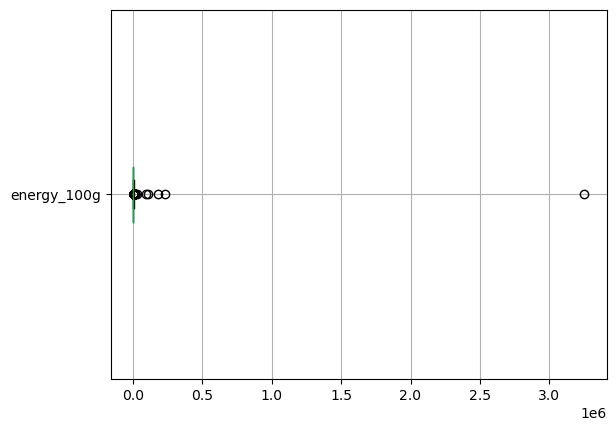

In [130]:
data_clean.boxplot(column="energy_100g", vert=False)
plt.show()

In [97]:
dtc['energy_100g'].describe()

count    2.456540e+05
mean     1.158902e+03
std      6.637535e+03
min      1.128000e-01
25%      4.180000e+02
50%      1.117000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

In [98]:
dtc.sort_values(by='pnns_groups_1', inplace=True, ignore_index=True)

In [99]:
dtc[['pnns_groups_1','pnns_groups_2']].value_counts(dropna=False)

pnns_groups_1            pnns_groups_2                   
NaN                      NaN                                 178969
unknown                  unknown                              12092
Composite foods          One-dish meals                        4902
Sugary snacks            Biscuits and cakes                    3976
Cereals and potatoes     Cereals                               3670
Sugary snacks            Sweets                                3443
Milk and dairy products  Cheese                                3216
                         Milk and yogurt                       2873
Fat and sauces           Dressings and sauces                  2753
Sugary snacks            Chocolate products                    2615
Fish Meat Eggs           Processed meat                        2539
                         Fish and seafood                      2039
Beverages                Sweetened beverages                   1922
                         Non-sugared beverages            

In [100]:
dtc['pnns_groups_1'].replace('unknown', np.nan, inplace=True)
dtc['pnns_groups_2'].replace('unknown', np.nan, inplace=True)

In [101]:
dtc[['pnns_groups_1','pnns_groups_2']].value_counts(dropna=False)

pnns_groups_1            pnns_groups_2                   
NaN                      NaN                                 191061
Composite foods          One-dish meals                        4902
Sugary snacks            Biscuits and cakes                    3976
Cereals and potatoes     Cereals                               3670
Sugary snacks            Sweets                                3443
Milk and dairy products  Cheese                                3216
                         Milk and yogurt                       2873
Fat and sauces           Dressings and sauces                  2753
Sugary snacks            Chocolate products                    2615
Fish Meat Eggs           Processed meat                        2539
                         Fish and seafood                      2039
Beverages                Sweetened beverages                   1922
                         Non-sugared beverages                 1898
Salty snacks             Appetizers                       

In [137]:
dtc['nutrition_grade_fr'].value_counts(dropna=False)

d      37541
c      36095
a      34612
b      31977
NaN    26425
e      19494
Name: nutrition_grade_fr, dtype: int64

In [102]:
dtc.drop(labels=['code', 'url', 'ingredients_text', 'additives', 'additives_n', 'last_modified_datetime'], axis=1, inplace=True)

In [103]:
dtc

,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g_computed
0,Thé vert Earl grey,Lobodis,c,Beverages,Non-sugared beverages,21.0,0.2,0.20,0.50,0.50,0.50,0.02540,0.010000,2.0,0.0,5.80
1,Jus d'Orange bio,Carrefour bio,NaN,Beverages,Fruit juices,172.0,0.0,NaN,9.40,8.70,0.70,0.03000,0.011811,NaN,NaN,40.40
2,Jus Multifruits,Carrefour,c,Beverages,Fruit juices,220.0,0.5,0.00,12.00,10.00,0.60,0.00000,0.000000,5.0,-3.0,54.90
3,Jus de Pomme et de Cerise à base de concentrés,Carrefour,c,Beverages,Fruit juices,181.0,0.5,0.10,11.00,10.00,0.50,0.03000,0.011811,4.0,-3.0,50.50
4,Pulp' Orange Light,Casino,c,Beverages,Artificially sweetened beverages,22.0,0.5,0.00,1.20,1.20,0.50,0.00000,0.000000,2.0,0.0,11.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245649,Natural Cassava,Industria De Casabe Paul,a,NaN,NaN,1477.0,0.0,0.00,87.06,2.35,1.18,0.03048,0.012000,-1.0,-1.0,352.96
245650,Raspados Ice Bars,"Jarritos, The Jel Sert Company",NaN,NaN,NaN,368.0,0.0,NaN,21.05,19.30,0.00,0.04572,0.018000,NaN,NaN,84.20
245651,Test NF App,NaN,NaN,NaN,NaN,569.0,31.0,NaN,12.20,9.60,2.10,1.10000,0.433071,NaN,NaN,336.20
245652,Amandes,Biosic,b,NaN,NaN,2406.0,NaN,3.73,NaN,3.89,21.22,0.10000,0.039370,0.0,0.0,NaN


In [104]:
dtc.loc[~dtc['pnns_groups_1'].isnull()].shape

(54403, 16)

In [105]:
dtc["pnns_groups_1"].shape

(245654,)

In [106]:
data_clean=dtc.copy()

## Changeons les valeurs manquantes avec la moyenne

In [109]:
dtc.loc[dtc['fat_100g'].isnull(),['fat_100g']]=dtc['fat_100g'].mean()

In [110]:
dtc.loc[dtc['fat_100g'].isnull()].shape

(0, 16)

In [111]:
dtc.loc[dtc['saturated-fat_100g'].isnull(),['saturated-fat_100g']]=dtc['saturated-fat_100g'].mean()

In [112]:
dtc.loc[dtc['carbohydrates_100g'].isnull(),['carbohydrates_100g']]=dtc['carbohydrates_100g'].mean()

In [113]:
dtc.loc[dtc['sugars_100g'].isnull(),['sugars_100g']]=dtc['sugars_100g'].mean()

In [114]:
dtc.loc[dtc['proteins_100g'].isnull(),['proteins_100g']]=dtc['proteins_100g'].mean()

In [115]:
dtc.loc[dtc['salt_100g'].isnull(),['salt_100g']]=dtc['salt_100g'].mean()

In [116]:
dtc.loc[dtc['sodium_100g'].isnull(),['sodium_100g']]=dtc['sodium_100g'].mean()

In [117]:
dtc.loc[dtc['nutrition-score-fr_100g'].isnull(),['nutrition-score-fr_100g']]=dtc['nutrition-score-fr_100g'].mean()

In [118]:
dtc

,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g_computed
0,Thé vert Earl grey,Lobodis,c,Beverages,Non-sugared beverages,21.0,0.200000,0.200000,0.500000,0.50,0.50,0.02540,0.010000,2.000000,0.0,5.80
1,Jus d'Orange bio,Carrefour bio,NaN,Beverages,Fruit juices,172.0,0.000000,5.051441,9.400000,8.70,0.70,0.03000,0.011811,9.041599,NaN,40.40
2,Jus Multifruits,Carrefour,c,Beverages,Fruit juices,220.0,0.500000,0.000000,12.000000,10.00,0.60,0.00000,0.000000,5.000000,-3.0,54.90
3,Jus de Pomme et de Cerise à base de concentrés,Carrefour,c,Beverages,Fruit juices,181.0,0.500000,0.100000,11.000000,10.00,0.50,0.03000,0.011811,4.000000,-3.0,50.50
4,Pulp' Orange Light,Casino,c,Beverages,Artificially sweetened beverages,22.0,0.500000,0.000000,1.200000,1.20,0.50,0.00000,0.000000,2.000000,0.0,11.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245649,Natural Cassava,Industria De Casabe Paul,a,NaN,NaN,1477.0,0.000000,0.000000,87.060000,2.35,1.18,0.03048,0.012000,-1.000000,-1.0,352.96
245650,Raspados Ice Bars,"Jarritos, The Jel Sert Company",NaN,NaN,NaN,368.0,0.000000,5.051441,21.050000,19.30,0.00,0.04572,0.018000,9.041599,NaN,84.20
245651,Test NF App,NaN,NaN,NaN,NaN,569.0,31.000000,5.051441,12.200000,9.60,2.10,1.10000,0.433071,9.041599,NaN,336.20
245652,Amandes,Biosic,b,NaN,NaN,2406.0,12.831987,3.730000,32.482018,3.89,21.22,0.10000,0.039370,0.000000,0.0,NaN


,code,url,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,d,NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,b,NaN,NaN,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250000,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,d,NaN,NaN,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482000,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,NaN,1933.0,18.27,1.92,63.46,11.54,13.46,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320756,989898,http://world-fr.openfoodfacts.org/produit/9898...,2016-09-12T15:40:15Z,Test NF App,NaN,"Coco, choco",0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],NaN,NaN,NaN,569.0,31.00,NaN,12.20,9.60,2.10,1.10000,0.433071,NaN,NaN
320757,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,2017-04-01T20:52:19Z,Amandes,Biosic,NaN,NaN,NaN,b,NaN,NaN,2406.0,NaN,3.73,NaN,3.89,21.22,0.10000,0.039370,0.0,0.0
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,2013-06-20T01:09:16Z,Thé vert Earl grey,Lobodis,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,Beverages,Non-sugared beverages,21.0,0.20,0.20,0.50,0.50,0.50,0.02540,0.010000,2.0,0.0
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,b,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00000,0.000000,0.0,0.0


# Changeons les valeurs manquantes avec KNNImputer

In [120]:
dtc_imputer=data_clean.copy()

In [121]:
dtc_imputer

,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g_computed
0,Thé vert Earl grey,Lobodis,c,Beverages,Non-sugared beverages,21.0,0.2,0.20,0.50,0.50,0.50,0.02540,0.010000,2.0,0.0,5.80
1,Jus d'Orange bio,Carrefour bio,NaN,Beverages,Fruit juices,172.0,0.0,NaN,9.40,8.70,0.70,0.03000,0.011811,NaN,NaN,40.40
2,Jus Multifruits,Carrefour,c,Beverages,Fruit juices,220.0,0.5,0.00,12.00,10.00,0.60,0.00000,0.000000,5.0,-3.0,54.90
3,Jus de Pomme et de Cerise à base de concentrés,Carrefour,c,Beverages,Fruit juices,181.0,0.5,0.10,11.00,10.00,0.50,0.03000,0.011811,4.0,-3.0,50.50
4,Pulp' Orange Light,Casino,c,Beverages,Artificially sweetened beverages,22.0,0.5,0.00,1.20,1.20,0.50,0.00000,0.000000,2.0,0.0,11.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245649,Natural Cassava,Industria De Casabe Paul,a,NaN,NaN,1477.0,0.0,0.00,87.06,2.35,1.18,0.03048,0.012000,-1.0,-1.0,352.96
245650,Raspados Ice Bars,"Jarritos, The Jel Sert Company",NaN,NaN,NaN,368.0,0.0,NaN,21.05,19.30,0.00,0.04572,0.018000,NaN,NaN,84.20
245651,Test NF App,NaN,NaN,NaN,NaN,569.0,31.0,NaN,12.20,9.60,2.10,1.10000,0.433071,NaN,NaN,336.20
245652,Amandes,Biosic,b,NaN,NaN,2406.0,NaN,3.73,NaN,3.89,21.22,0.10000,0.039370,0.0,0.0,NaN


In [122]:
from sklearn.impute import KNNImputer

In [123]:
dtc_imputer.drop(labels=['pnns_groups_1','pnns_groups_2', 'product_name', 'brands'], axis=1, inplace = True)

In [125]:
dtc_imputer.drop(labels='nutrition_grade_fr', axis=1, inplace = True)

In [126]:
impute = KNNImputer(n_neighbors=3)
dtc_imputed=impute.fit_transform(dtc_imputer)

In [127]:
dtc_imputer = pd.DataFrame(dtc_imputed , columns=dtc_imputer.columns)

In [128]:
dtc_imputer

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g_computed
0,21.0,0.2,0.20,0.50,0.50,0.50,0.02540,0.010000,2.000000,0.000000,5.800000
1,172.0,0.0,0.00,9.40,8.70,0.70,0.03000,0.011811,2.000000,-4.000000,40.400000
2,220.0,0.5,0.00,12.00,10.00,0.60,0.00000,0.000000,5.000000,-3.000000,54.900000
3,181.0,0.5,0.10,11.00,10.00,0.50,0.03000,0.011811,4.000000,-3.000000,50.500000
4,22.0,0.5,0.00,1.20,1.20,0.50,0.00000,0.000000,2.000000,0.000000,11.300000
...,...,...,...,...,...,...,...,...,...,...,...
245649,1477.0,0.0,0.00,87.06,2.35,1.18,0.03048,0.012000,-1.000000,-1.000000,352.960000
245650,368.0,0.0,0.00,21.05,19.30,0.00,0.04572,0.018000,2.000000,2.000000,84.200000
245651,569.0,31.0,2.50,12.20,9.60,2.10,1.10000,0.433071,4.666667,4.666667,336.200000
245652,2406.0,49.8,3.73,20.33,3.89,21.22,0.10000,0.039370,0.000000,0.000000,614.933333


In [131]:
data_cln=data_clean.copy()

In [132]:
data_cln.update(dtc_imputer)

In [133]:
data_cln

,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g_computed
0,Thé vert Earl grey,Lobodis,c,Beverages,Non-sugared beverages,21.0,0.2,0.20,0.50,0.50,0.50,0.02540,0.010000,2.000000,0.000000,5.800000
1,Jus d'Orange bio,Carrefour bio,NaN,Beverages,Fruit juices,172.0,0.0,0.00,9.40,8.70,0.70,0.03000,0.011811,2.000000,-4.000000,40.400000
2,Jus Multifruits,Carrefour,c,Beverages,Fruit juices,220.0,0.5,0.00,12.00,10.00,0.60,0.00000,0.000000,5.000000,-3.000000,54.900000
3,Jus de Pomme et de Cerise à base de concentrés,Carrefour,c,Beverages,Fruit juices,181.0,0.5,0.10,11.00,10.00,0.50,0.03000,0.011811,4.000000,-3.000000,50.500000
4,Pulp' Orange Light,Casino,c,Beverages,Artificially sweetened beverages,22.0,0.5,0.00,1.20,1.20,0.50,0.00000,0.000000,2.000000,0.000000,11.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245649,Natural Cassava,Industria De Casabe Paul,a,NaN,NaN,1477.0,0.0,0.00,87.06,2.35,1.18,0.03048,0.012000,-1.000000,-1.000000,352.960000
245650,Raspados Ice Bars,"Jarritos, The Jel Sert Company",NaN,NaN,NaN,368.0,0.0,0.00,21.05,19.30,0.00,0.04572,0.018000,2.000000,2.000000,84.200000
245651,Test NF App,NaN,NaN,NaN,NaN,569.0,31.0,2.50,12.20,9.60,2.10,1.10000,0.433071,4.666667,4.666667,336.200000
245652,Amandes,Biosic,b,NaN,NaN,2406.0,49.8,3.73,20.33,3.89,21.22,0.10000,0.039370,0.000000,0.000000,614.933333


## Ici on a créé un dataframe spécial pour y appliquer la méthode KNNImputer puis on a changé les valeurs manquantes de data_cln par celle trouvées dans ce nouveau dataframe

## On va choisir data_cln pour travailler sur la suite

# On va changer dtc pour n'avoir que ce qui va nous servir pour un KNN pour compléter pnns_groups

In [139]:
dtc=data_cln.copy()

In [140]:
dtc.drop(labels=['product_name','brands','nutrition-score-uk_100g','nutrition_grade_fr','pnns_groups_2','energy_100g_computed'], axis=1, inplace=True)

In [141]:
dtc

,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Beverages,21.0,0.2,0.20,0.50,0.50,0.50,0.02540,0.010000,2.000000
1,Beverages,172.0,0.0,0.00,9.40,8.70,0.70,0.03000,0.011811,2.000000
2,Beverages,220.0,0.5,0.00,12.00,10.00,0.60,0.00000,0.000000,5.000000
3,Beverages,181.0,0.5,0.10,11.00,10.00,0.50,0.03000,0.011811,4.000000
4,Beverages,22.0,0.5,0.00,1.20,1.20,0.50,0.00000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...
245649,NaN,1477.0,0.0,0.00,87.06,2.35,1.18,0.03048,0.012000,-1.000000
245650,NaN,368.0,0.0,0.00,21.05,19.30,0.00,0.04572,0.018000,2.000000
245651,NaN,569.0,31.0,2.50,12.20,9.60,2.10,1.10000,0.433071,4.666667
245652,NaN,2406.0,49.8,3.73,20.33,3.89,21.22,0.10000,0.039370,0.000000


In [142]:
dtc_pnns=dtc.drop(labels=dtc.loc[dtc['pnns_groups_1'].isnull()].index, axis=0)

In [143]:
dtc_pnns #on a regroupé l'échantillon d'entraînement pour le knn

,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Beverages,21.0,0.200000,0.2,0.500000,0.5,0.5,0.0254,0.010000,2.0
1,Beverages,172.0,0.000000,0.0,9.400000,8.7,0.7,0.0300,0.011811,2.0
2,Beverages,220.0,0.500000,0.0,12.000000,10.0,0.6,0.0000,0.000000,5.0
3,Beverages,181.0,0.500000,0.1,11.000000,10.0,0.5,0.0300,0.011811,4.0
4,Beverages,22.0,0.500000,0.0,1.200000,1.2,0.5,0.0000,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...
54398,sugary-snacks,1740.0,23.300000,9.8,45.400000,22.0,5.4,0.8000,0.314961,21.0
54399,sugary-snacks,1532.0,14.000000,9.1,51.000000,12.0,7.4,0.8200,0.322835,18.0
54400,sugary-snacks,1490.0,11.000000,5.1,55.200000,18.9,8.4,1.1300,0.444882,17.0
54401,sugary-snacks,1531.0,11.433333,9.3,57.333333,52.0,7.5,1.1000,0.433071,25.0


In [144]:
dtc_knn=dtc.drop(labels=dtc_pnns.index, axis=0)

In [145]:
dtc_knn #Ici on a l'échantillon sur lequel on devra appliquer le knn

,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
54403,NaN,199.0,1.7,1.10,6.10,5.80,1.70,0.10000,0.039370,1.000000
54404,NaN,403.0,3.2,1.80,13.10,10.00,3.40,0.10000,0.039370,2.000000
54405,NaN,1933.0,17.9,1.60,59.00,17.10,13.60,0.20000,0.078740,4.000000
54406,NaN,1598.0,3.7,0.80,73.50,20.80,8.80,0.93000,0.366142,7.000000
54407,NaN,275.0,3.5,2.00,4.80,4.80,3.80,0.11430,0.045000,0.000000
...,...,...,...,...,...,...,...,...,...,...
245649,NaN,1477.0,0.0,0.00,87.06,2.35,1.18,0.03048,0.012000,-1.000000
245650,NaN,368.0,0.0,0.00,21.05,19.30,0.00,0.04572,0.018000,2.000000
245651,NaN,569.0,31.0,2.50,12.20,9.60,2.10,1.10000,0.433071,4.666667
245652,NaN,2406.0,49.8,3.73,20.33,3.89,21.22,0.10000,0.039370,0.000000


In [146]:
from sklearn.model_selection import train_test_split as tts

In [148]:
target=dtc_pnns['pnns_groups_1']

In [149]:
target

0            Beverages
1            Beverages
2            Beverages
3            Beverages
4            Beverages
             ...      
54398    sugary-snacks
54399    sugary-snacks
54400    sugary-snacks
54401    sugary-snacks
54402    sugary-snacks
Name: pnns_groups_1, Length: 54403, dtype: object

In [150]:
dtc_pnns.shape

(54403, 10)

In [151]:
dtc_pnns.drop(labels='pnns_groups_1', axis=1, inplace=True)

In [152]:
target.shape

(54403,)

In [153]:
x_train, x_test, y_train, y_test = tts(dtc_pnns, target, train_size=0.75)

In [154]:
from sklearn import neighbors

In [155]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [156]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [180]:
model.predict(x_test)[2]

'Milk and dairy products'

In [174]:
y_test.iloc[2]

'Milk and dairy products'

In [181]:
1 - model.score(x_test, y_test)

0.17116388500845525

## Ici on a fait un premier essai avec 3 voisins et on obtient un score de 17% d'erreur. On va maintenant essayer de l'améliorer

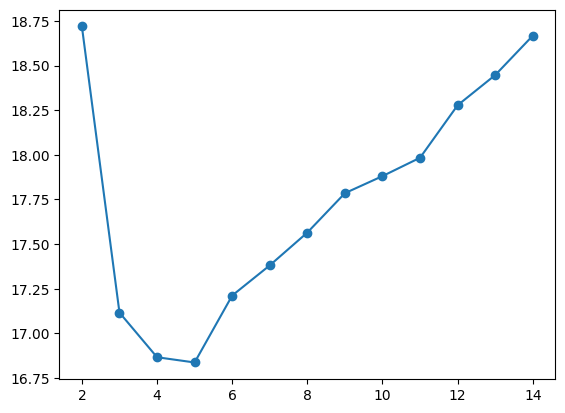

In [183]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

## On voit que le k le plus optimisé serait 7 mais n'aurait quand même pas moins de 16% d'erreur, ce qui est trop élevé. On va donc trier les variables d'entrée.

In [188]:
dtc=data_cln.copy()
dtc.drop(labels=['product_name','brands','nutrition-score-uk_100g','nutrition_grade_fr','pnns_groups_2','energy_100g_computed'], axis=1, inplace=True)

In [192]:
dtc.drop(labels=['sodium_100g','nutrition-score-fr_100g'],axis=1, inplace=True)

In [210]:
dtc_pnns=dtc.drop(labels=dtc.loc[dtc['pnns_groups_1'].isnull()].index, axis=0)

dtc_pnns #on a regroupé l'échantillon d'entraînement pour le knn

dtc_knn=dtc.drop(labels=dtc_pnns.index, axis=0)

dtc_knn #Ici on a l'échantillon sur lequel on devra appliquer le knn

target=dtc_pnns['pnns_groups_1']

dtc_pnns.drop(labels='pnns_groups_1', axis=1, inplace=True)

x_train, x_test, y_train, y_test = tts(dtc_pnns, target, train_size=0.75)

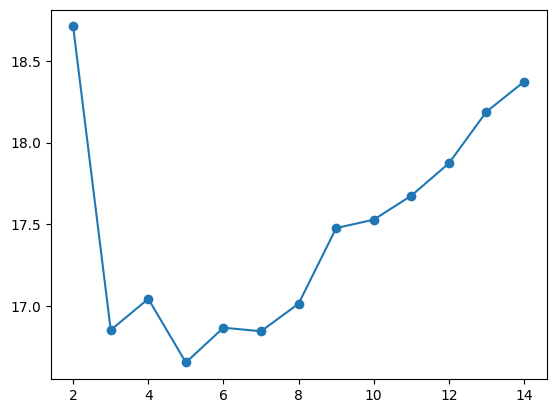

In [211]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

## Encore pire...

# On ne va pas tester toutes les combinaisons possibles. On va tenter d'automatiser tout ça..

In [275]:
dtc=data_cln.copy()
dtc.drop(labels=['product_name','brands','nutrition-score-uk_100g','nutrition_grade_fr','pnns_groups_2','energy_100g_computed'], axis=1, inplace=True)

In [276]:
dtc_pnns=dtc.drop(labels=dtc.loc[dtc['pnns_groups_1'].isnull()].index, axis=0)
#on a regroupé l'échantillon d'entraînement pour le knn

dtc_knn=dtc.drop(labels=dtc_pnns.index, axis=0)
#Ici on a l'échantillon sur lequel on devra appliquer le knn

target=dtc_pnns['pnns_groups_1']

dtc_pnns.drop(labels='pnns_groups_1', axis=1, inplace=True)

In [277]:
import itertools

In [278]:
col_names = dtc_pnns.columns

In [279]:
col_names

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [280]:
combinations = itertools.combinations(col_names, 3)

In [281]:
dtc_pnns

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,21.0,0.200000,0.2,0.500000,0.5,0.5,0.0254,0.010000,2.0
1,172.0,0.000000,0.0,9.400000,8.7,0.7,0.0300,0.011811,2.0
2,220.0,0.500000,0.0,12.000000,10.0,0.6,0.0000,0.000000,5.0
3,181.0,0.500000,0.1,11.000000,10.0,0.5,0.0300,0.011811,4.0
4,22.0,0.500000,0.0,1.200000,1.2,0.5,0.0000,0.000000,2.0
...,...,...,...,...,...,...,...,...,...
54398,1740.0,23.300000,9.8,45.400000,22.0,5.4,0.8000,0.314961,21.0
54399,1532.0,14.000000,9.1,51.000000,12.0,7.4,0.8200,0.322835,18.0
54400,1490.0,11.000000,5.1,55.200000,18.9,8.4,1.1300,0.444882,17.0
54401,1531.0,11.433333,9.3,57.333333,52.0,7.5,1.1000,0.433071,25.0


Le bloc suivant va nous prendre quelques dizaines de minutes mais va nous donner le KNN le plus optimisé. 

In [282]:
error_min=100
for i in range(1, len(col_names)):
    combinations = itertools.combinations(col_names, i)
    for comb in combinations:
        labels = []
        for val in comb:
            labels.append(val)
        d = dtc_pnns.drop(labels = labels, axis=1)
        x_train, x_test, y_train, y_test = tts(d, target, train_size=0.75)
        for k in range(2,15):
            knn = neighbors.KNeighborsClassifier(k)
            error=(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
            if error_min>error:
                error_min=error
                comb_opti=comb
                k_opti=k
            
print(error_min, comb_opti, k_opti)          

12.7711197706051 ('energy_100g',) 5


## On voit donc que le KNN le plus optimisé sera sur le dataframe privé de sa variable 'energy_100g' avec 6 voisins et aura 12,4% d'erreur, ce qui est plutôt élevé tout de même

In [286]:
d = dtc_pnns.drop(labels = 'energy_100g', axis=1)

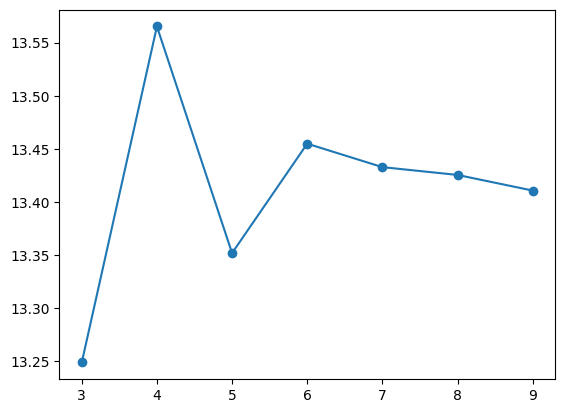

In [293]:
d=dtc.drop(labels=dtc.loc[dtc['pnns_groups_1'].isnull()].index, axis=0)
#on a regroupé l'échantillon d'entraînement pour le knn
d.drop(labels = 'energy_100g', axis=1, inplace = True)

dtc_knn=d.drop(labels=dtc_pnns.index, axis=0)
#Ici on a l'échantillon sur lequel on devra appliquer le knn

target=d['pnns_groups_1']

d.drop(labels='pnns_groups_1', axis=1, inplace=True)

x_train, x_test, y_train, y_test = tts(d, target, train_size=0.75)

errors = []
for k in range(3,10):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(3,10), errors, 'o-')
plt.show()

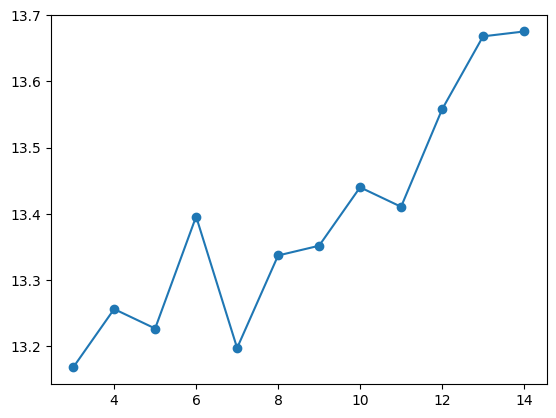

In [294]:
d=dtc.drop(labels=dtc.loc[dtc['pnns_groups_1'].isnull()].index, axis=0)
#on a regroupé l'échantillon d'entraînement pour le knn
d.drop(labels = 'energy_100g', axis=1, inplace = True)

dtc_knn=d.drop(labels=dtc_pnns.index, axis=0)
#Ici on a l'échantillon sur lequel on devra appliquer le knn

target=d['pnns_groups_1']

d.drop(labels='pnns_groups_1', axis=1, inplace=True)

x_train, x_test, y_train, y_test = tts(d, target, train_size=0.75)

errors = []
for k in range(3,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(3,15), errors, 'o-')
plt.show()

## Honnêtement je ne comprends pas pourquoi les résultats varient autant mais je vois que la plupart du temps le k le plus optimisé est le 3 donc je vais utiliser celui là

In [301]:
knn = neighbors.KNeighborsClassifier(3)
knn.fit(x_train, y_train)
predicted = knn.predict(dtc_knn['pnns_groups_1'])

/home/lolonois/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [297]:
x_test

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
3648,0.1,0.0,11.8,10.600000,0.1,0.008000,0.003150,15.000000
49522,40.6,26.2,37.7,31.833333,9.5,0.013333,0.005249,20.333333
40770,19.0,2.4,65.0,2.100000,8.4,2.700000,1.062992,17.000000
37992,17.8,13.2,3.5,3.000000,8.3,1.300000,0.511811,12.000000
16989,3.9,0.9,20.0,0.500000,7.1,0.750000,0.295276,-2.000000
...,...,...,...,...,...,...,...,...
39852,15.0,10.0,6.3,3.500000,2.5,0.060000,0.023622,11.000000
2332,0.1,0.1,2.0,2.000000,0.1,0.100000,0.039370,4.000000
28176,19.0,2.8,1.6,1.300000,12.0,1.300000,0.511811,3.000000
29280,35.0,11.0,0.5,0.500000,15.0,1.000000,0.393701,18.000000


In [298]:
y_test

3648                   Beverages
49522              Sugary snacks
40770               Salty snacks
37992    Milk and dairy products
16989            Composite foods
                  ...           
39852    Milk and dairy products
2332                   Beverages
28176             Fish Meat Eggs
29280             Fish Meat Eggs
53086              Sugary snacks
Name: pnns_groups_1, Length: 13601, dtype: object